In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./DATA/customer_booking.csv", encoding="ISO-8859-1")
df.head(30)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [3]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

<i>Information about the columns</i>
- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on

- 
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [4]:
df.describe(include='all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000,50000,50000.000000,50000.00000,50000.00000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44382,49497,NaN,NaN,NaN,8102,2680,17872,NaN,NaN,NaN,NaN,NaN
mean,1.591240,NaN,NaN,84.940480,23.04456,9.06634,NaN,NaN,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,NaN,NaN,90.451378,33.88767,5.41266,NaN,NaN,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,NaN,NaN,0.000000,0.00000,0.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.00000,5.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.00000,9.00000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.00000,13.00000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [5]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
days = {
    'Mon':1,
    'Tue':2,
    'Wed':3,
    'Thu':4,
    'Fri':5,
    'Sat':6,
    'Sun':7,
}

In [7]:
df["flight_day"] = df["flight_day"].map(days)

In [8]:
df['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [9]:
df.describe()


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [10]:
df.head(40)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,4,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,4,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,1,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,1,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,7,AKLDEL,India,0,0,0,5.52,0


In [11]:
df['sales_channel'].value_counts()


sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [12]:
df = pd.get_dummies(df, columns=['sales_channel'])


df.head(30)

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile
0,2,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,True,False
1,1,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,True,False
2,2,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,True,False
3,1,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,True,False
4,2,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,True,False
5,1,RoundTrip,3,48,20,4,AKLDEL,New Zealand,1,0,1,5.52,0,True,False
6,3,RoundTrip,201,33,6,4,AKLDEL,New Zealand,1,0,1,5.52,0,True,False
7,2,RoundTrip,238,19,14,1,AKLDEL,India,1,0,1,5.52,0,True,False
8,1,RoundTrip,80,22,4,1,AKLDEL,New Zealand,0,0,1,5.52,0,True,False
9,1,RoundTrip,378,30,12,7,AKLDEL,India,0,0,0,5.52,0,False,True


<Axes: xlabel='purchase_lead', ylabel='booking_complete'>

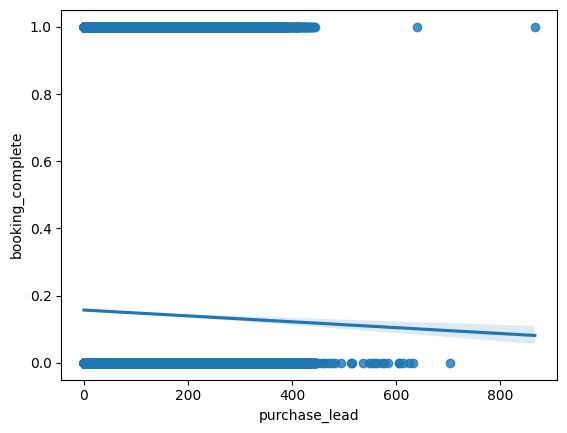

In [13]:
import seaborn as sns 
sns.regplot(x='purchase_lead',y='booking_complete',data=df)

<Axes: xlabel='wants_extra_baggage', ylabel='booking_complete'>

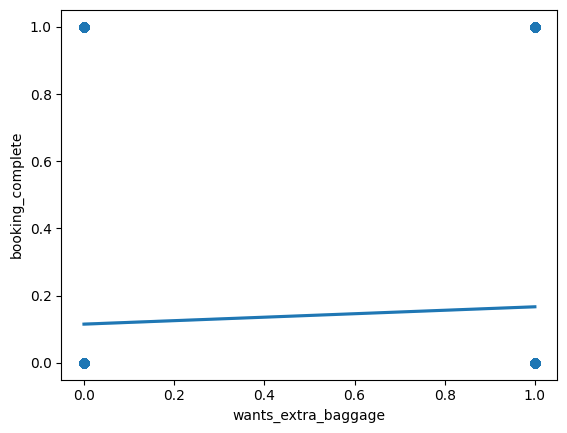

In [14]:
sns.regplot(x='wants_extra_baggage',y='booking_complete',data=df)

<Axes: xlabel='wants_preferred_seat', ylabel='booking_complete'>

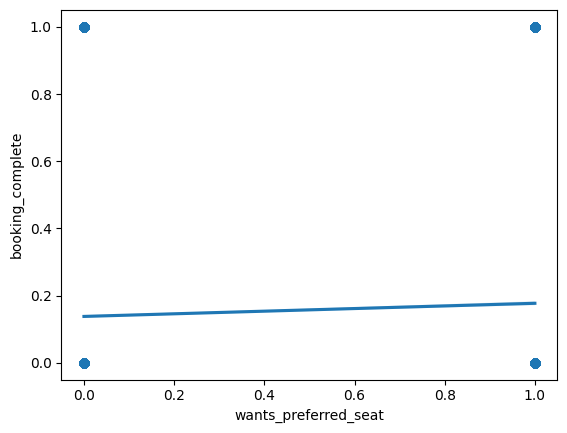

In [15]:
sns.regplot(x='wants_preferred_seat',y='booking_complete',data=df)

<Axes: xlabel='flight_hour', ylabel='booking_complete'>

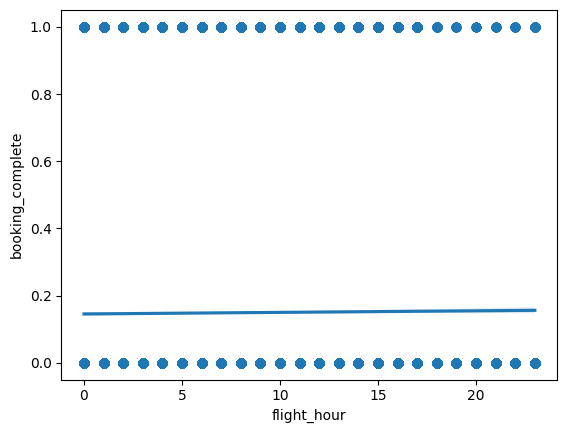

In [16]:
sns.regplot(x='flight_hour',y='booking_complete',data=df)

<Axes: xlabel='flight_day', ylabel='booking_complete'>

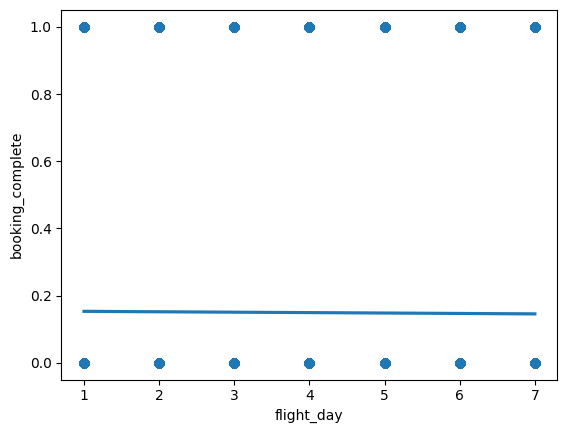

In [17]:
sns.regplot(x='flight_day',y='booking_complete',data=df)

<Axes: xlabel='flight_duration', ylabel='booking_complete'>

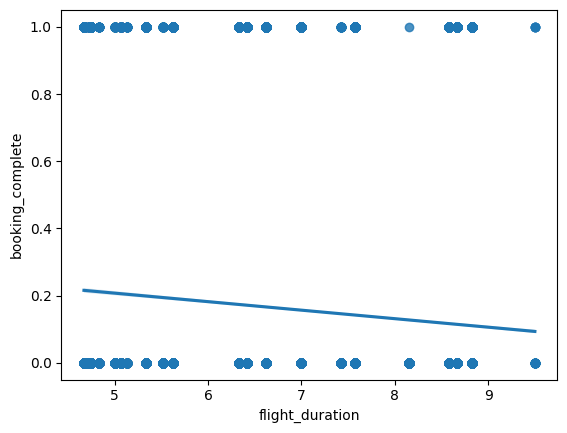

In [18]:
sns.regplot(x='flight_duration',y='booking_complete',data=df)


<Axes: xlabel='sales_channel_Mobile', ylabel='booking_complete'>

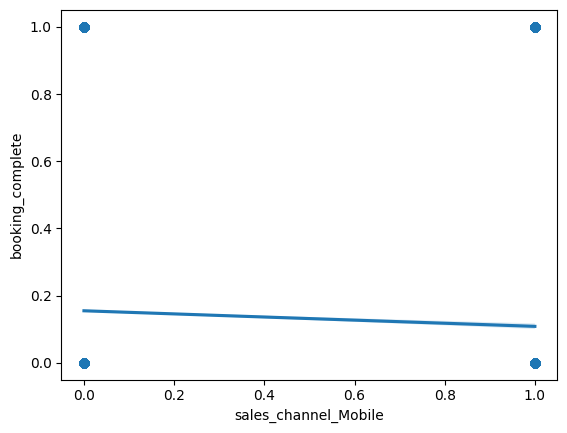

In [19]:
sns.regplot(x='sales_channel_Mobile',y='booking_complete',data=df)

<Axes: xlabel='length_of_stay', ylabel='booking_complete'>

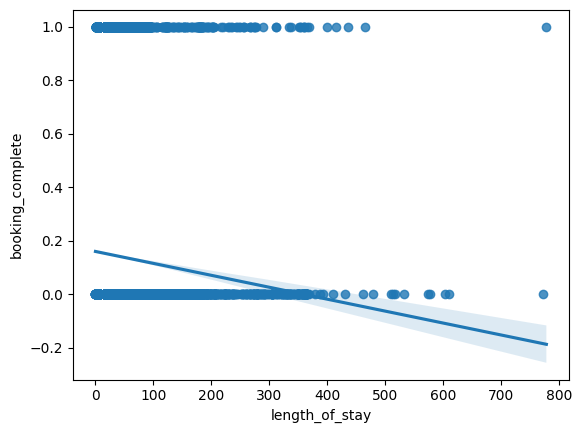

In [20]:
sns.regplot(x='length_of_stay',y='booking_complete',data=df)

<Axes: xlabel='num_passengers', ylabel='booking_complete'>

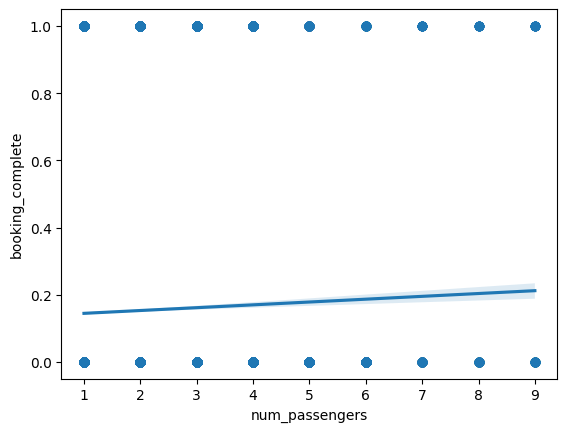

In [21]:
sns.regplot(x='num_passengers',y='booking_complete',data=df)

In [22]:
df = pd.get_dummies(df, columns=['trip_type'])

In [23]:
df.head(30)

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,True,False,False,False,True
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,True,False,False,False,True
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,True,False,False,False,True
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,True,False,False,False,True
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,True,False,False,False,True
5,1,3,48,20,4,AKLDEL,New Zealand,1,0,1,5.52,0,True,False,False,False,True
6,3,201,33,6,4,AKLDEL,New Zealand,1,0,1,5.52,0,True,False,False,False,True
7,2,238,19,14,1,AKLDEL,India,1,0,1,5.52,0,True,False,False,False,True
8,1,80,22,4,1,AKLDEL,New Zealand,0,0,1,5.52,0,True,False,False,False,True
9,1,378,30,12,7,AKLDEL,India,0,0,0,5.52,0,False,True,False,False,True


<Axes: xlabel='trip_type_CircleTrip', ylabel='booking_complete'>

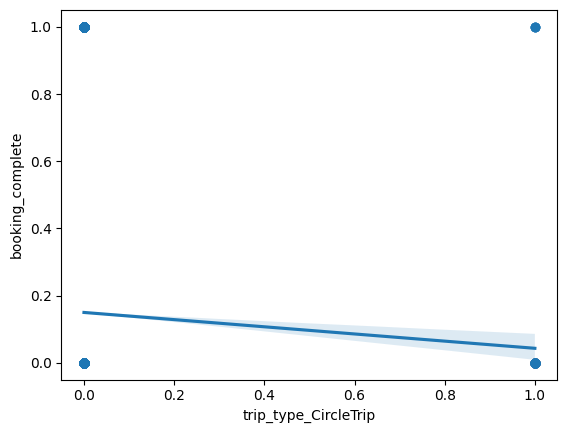

In [24]:
sns.regplot(x='trip_type_CircleTrip',y='booking_complete',data=df)

<Axes: xlabel='trip_type_OneWay', ylabel='booking_complete'>

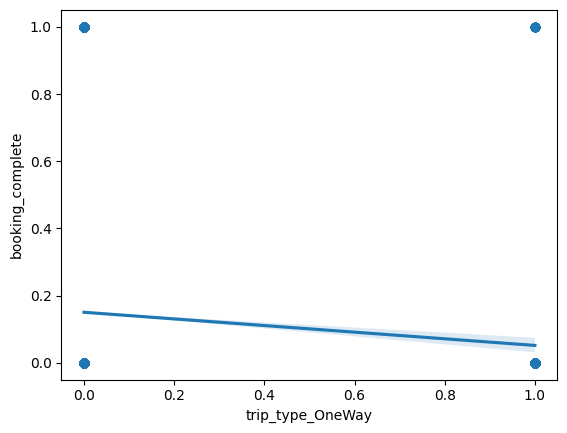

In [25]:
sns.regplot(x='trip_type_OneWay',y='booking_complete',data=df)

<Axes: xlabel='trip_type_RoundTrip', ylabel='booking_complete'>

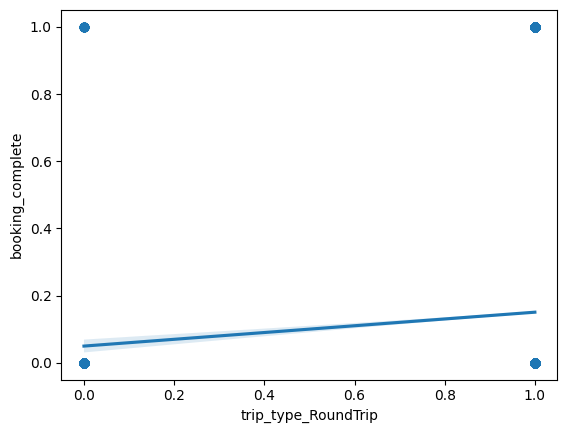

In [26]:
sns.regplot(x='trip_type_RoundTrip',y='booking_complete',data=df)

In [27]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


In [28]:
corr_columns = ['purchase_lead', 'length_of_stay', 'flight_day', 'wants_extra_baggage',
                    'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
                    'sales_channel_Internet', 'sales_channel_Mobile', 'trip_type_CircleTrip',
                    'trip_type_OneWay', 'trip_type_RoundTrip', 'booking_complete']
corr_df = df[corr_columns]

correlation_matrix = corr_df.corr()

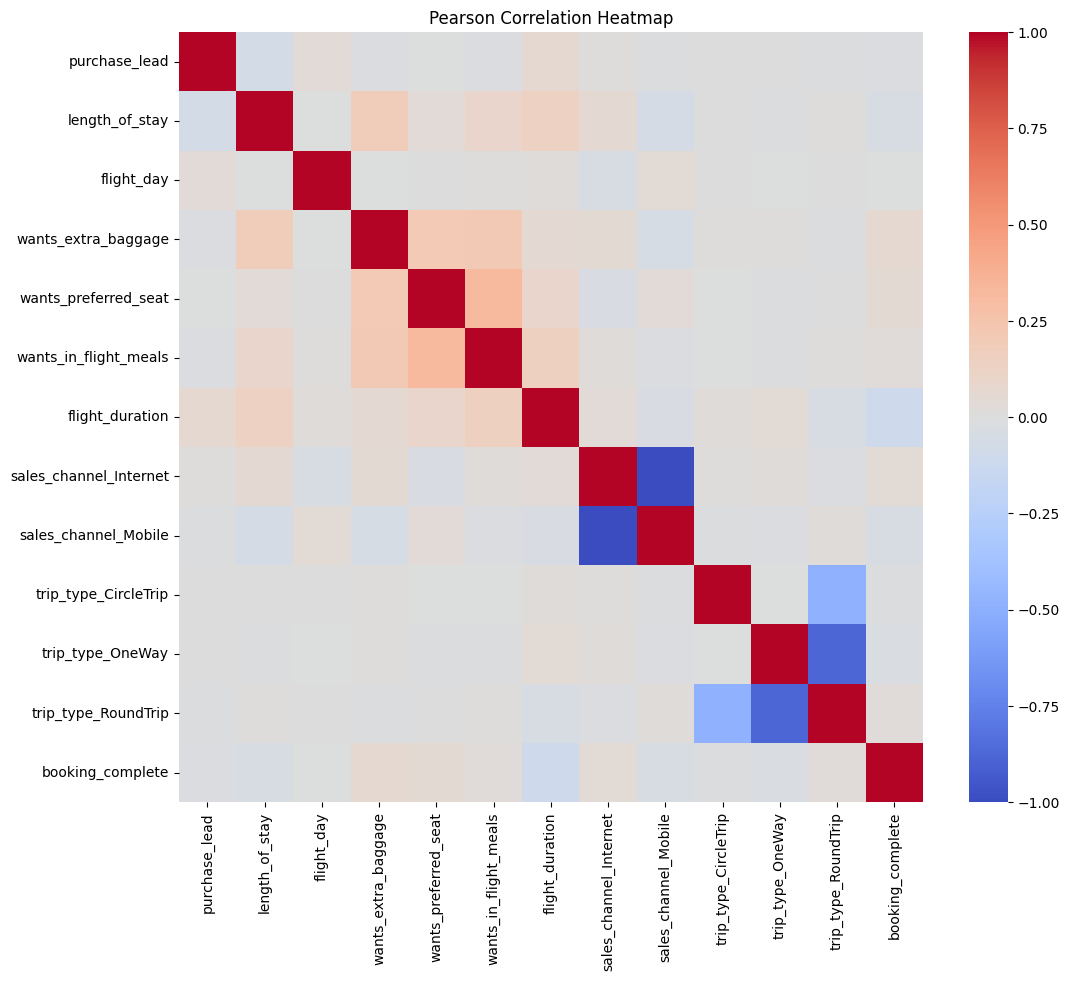

In [29]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,cmap="coolwarm", fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.savefig('./DATA/Correlation_heatmap.jpg',bbox_inches='tight', dpi=720)
plt.show()

In [30]:

features = ['purchase_lead', 'length_of_stay', 'flight_day', 'wants_extra_baggage',
                    'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
                    'sales_channel_Internet', 'sales_channel_Mobile', 'trip_type_CircleTrip',
                    'trip_type_OneWay', 'trip_type_RoundTrip']




X_train, X_test, y_train, y_test = train_test_split(df[features], df['booking_complete'], test_size=0.2, random_state=42)


degree = 3
model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())


model.fit(X_train, y_train)


y_pred = model.predict(X_test)




In [31]:
# evaluating the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

Mean Squared Error: 0.12438378564361778
R-squared: 0.013578657184860843


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21560\3772628589.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="blue", label="Actual")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21560\3772628589.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

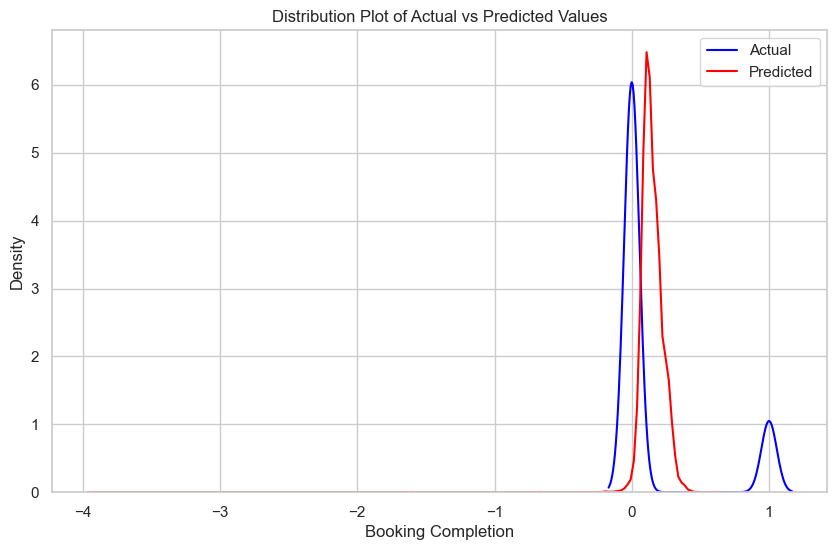

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


sns.distplot(y_test, hist=False, color="blue", label="Actual")


sns.distplot(y_pred, hist=False, color="red", label="Predicted")

plt.title("Distribution Plot of Actual vs Predicted Values")
plt.xlabel("Booking Completion")
plt.ylabel("Density")
plt.legend()
plt.savefig('./DATA/displot.jpg',bbox_inches='tight', dpi=720)
plt.show()
